In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

adding 50% of inaccuracies in avg_glucose_level values

ADDING 50% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 4681 rows in column 'avg_glucose_level'
Rows to modify: [4668, 7378, 1125, 4237, 1806, 713, 5328, 7902, 5724, 1539, 273, 6525, 7551, 3321, 7802, 3262, 2275, 6645, 5662, 3473, 8617, 462, 6611, 3955, 4917, 4848, 1017, 4922, 9116, 487, 982, 1197, 824, 1702, 9209, 5787, 4374, 5245, 9114, 4001, 3114, 5360, 2497, 6398, 551, 76, 9104, 8234, 2993, 3290, 3263, 65, 7334, 9296, 1830, 932, 7972, 993, 2552, 2598, 6962, 602, 1084, 5032, 7231, 3864, 3202, 5815, 2766, 2831, 440, 5198, 5148, 1377, 883, 3576, 88, 1600, 1916, 5770, 7406, 1834, 1809, 6304, 8409, 5224, 3260, 6666, 8309, 4490, 7876, 2357, 2401, 2435, 8948, 1680, 7291, 3910, 6192, 659, 9198, 485, 755, 1987, 2084, 9191, 5173, 2928, 2960, 582, 5820, 2617, 8889, 2570, 6729, 6341, 7305, 7762, 3865, 3406, 8436, 5310, 8819, 771, 2116, 3225, 3437, 8676, 3705, 9328, 8155, 2393, 5028, 3620, 1216, 2474, 8169, 565, 696, 4463, 1173, 5868, 7209, 1336, 9349, 6062, 73

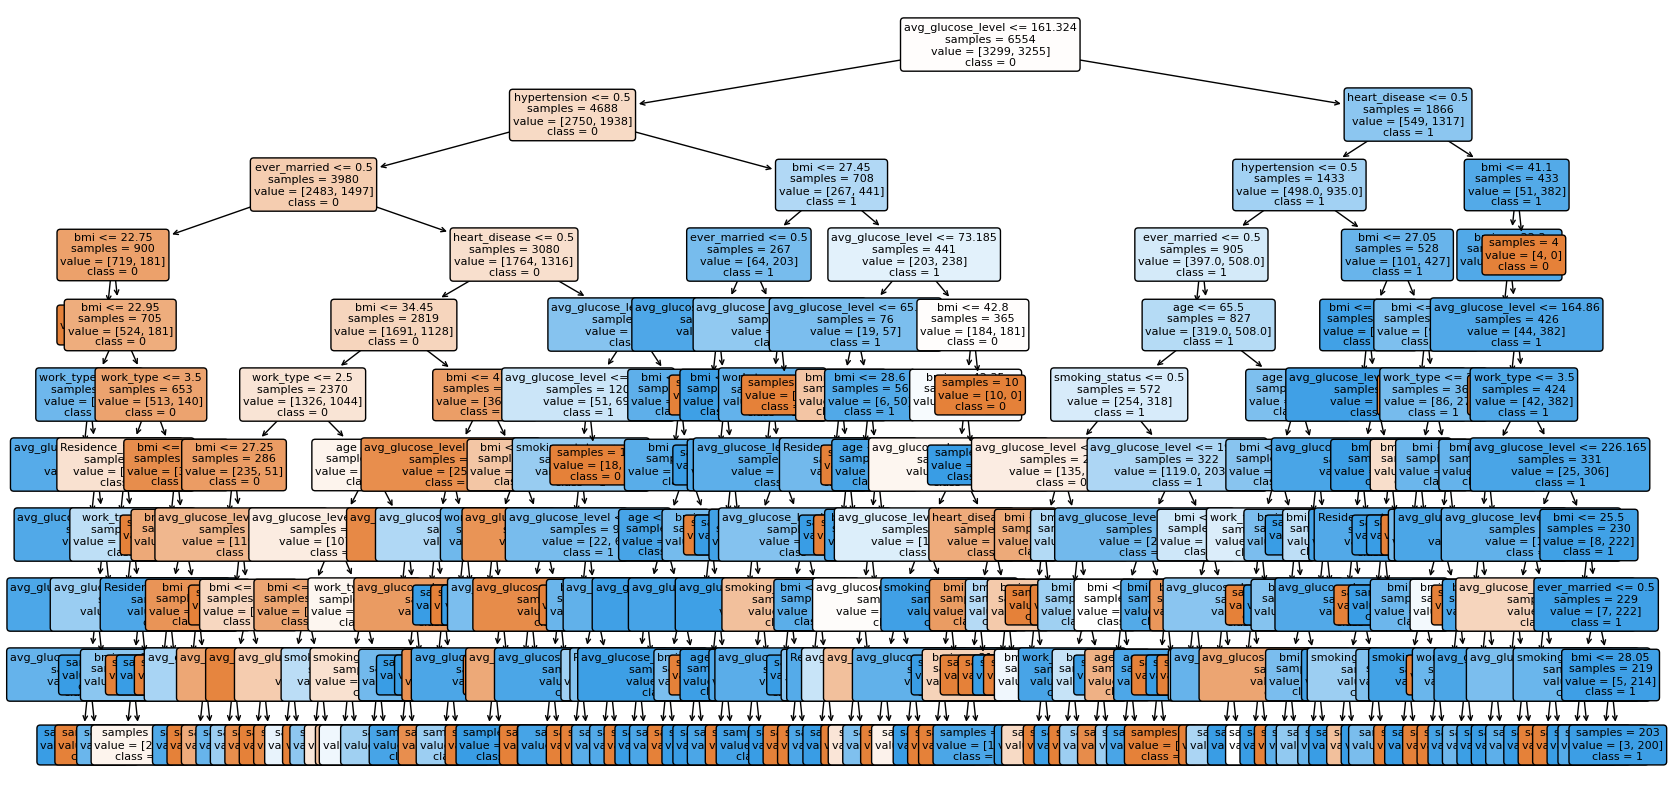

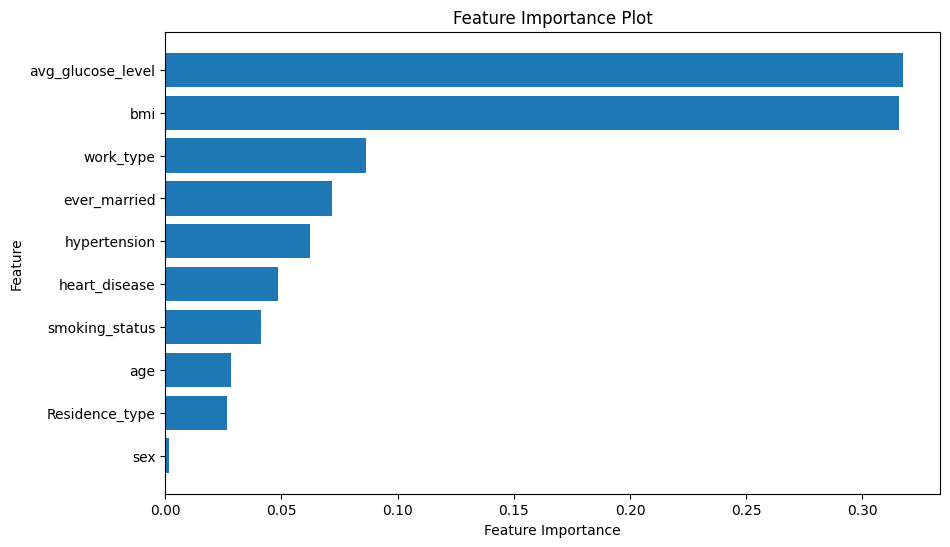

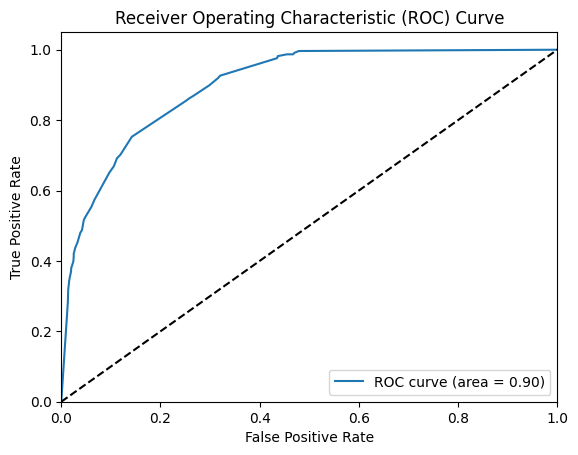

AUC Score: 0.8990597185241537


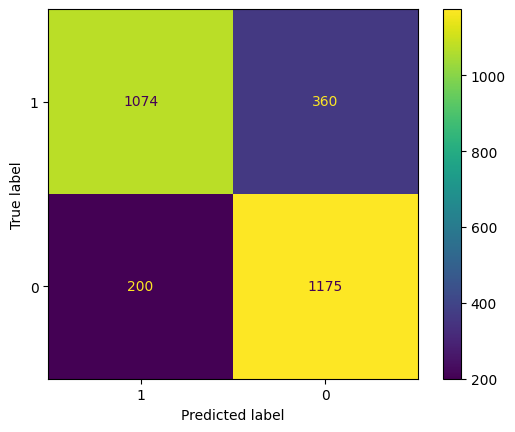

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.8256227758007118, 0.8576512455516014, 0.800711743772242, 0.8078291814946619, 0.8042704626334519, 0.7864768683274022, 0.8647686832740213, 0.8256227758007118, 0.8428571428571429]
Mean accuracy: 0.821652262328419
95% confidence interval: (0.8028105270657586, 0.8404939975910795)


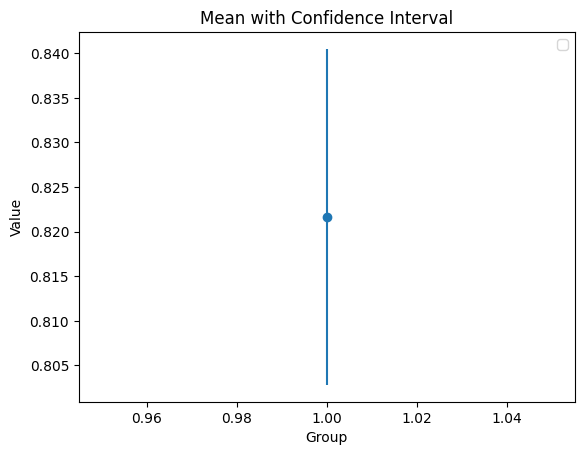


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1434
           1       0.77      0.79      0.78      1375

    accuracy                           0.78      2809
   macro avg       0.78      0.78      0.78      2809
weighted avg       0.78      0.78      0.78      2809



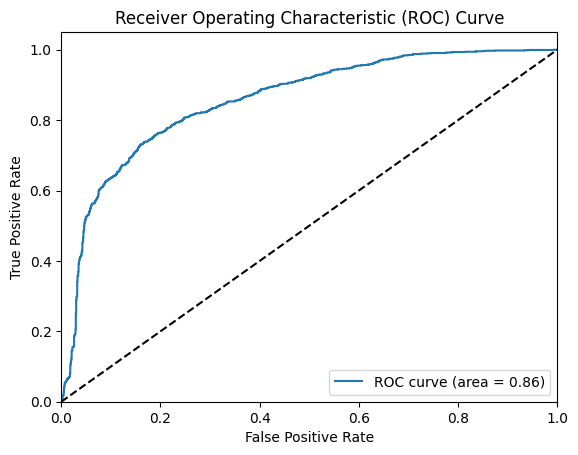

AUC Score: 0.8564934702675288


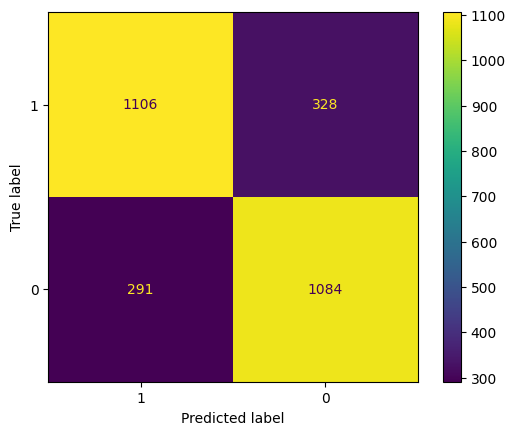

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7544483985765125, 0.7686832740213523, 0.7615658362989324, 0.7722419928825622, 0.8078291814946619, 0.8220640569395018, 0.7864768683274022, 0.7615658362989324, 0.7758007117437722, 0.7607142857142857]
Mean accuracy: 0.7771390442297916
95% confidence interval: (0.761296232640461, 0.7929818558191223)


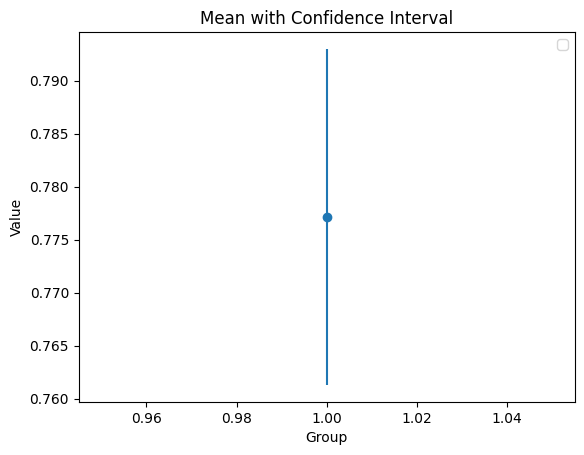

In [2]:

print('ADDING 50% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 50)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 50% of inaccuracies in bmi

ADDING 50% TO FEATURE: bmi
--------------------------------------
Modifying 4681 rows in column 'bmi'
Rows to modify: [2687, 8987, 9215, 7774, 544, 7940, 7335, 5294, 5850, 8912, 4637, 4884, 2644, 6078, 6902, 2122, 9220, 778, 7585, 6485, 9016, 3049, 3777, 1759, 6012, 5582, 4063, 4074, 389, 3050, 1663, 8202, 860, 5036, 5826, 5691, 4054, 4520, 2015, 7903, 9310, 1349, 8040, 9197, 3702, 4060, 6064, 7713, 3505, 7362, 1127, 7191, 8017, 4407, 2287, 641, 9119, 6693, 6272, 6072, 5516, 4000, 2960, 4500, 195, 6919, 3106, 6626, 9353, 6742, 2335, 2695, 5817, 5786, 4239, 6925, 3748, 1777, 835, 4391, 3230, 6042, 6868, 2580, 3985, 5982, 2979, 1606, 2658, 7432, 8010, 3, 2702, 9127, 419, 562, 8164, 1174, 3972, 289, 1549, 8523, 7091, 2720, 7836, 9343, 5599, 7355, 4504, 5016, 495, 878, 3058, 4152, 1980, 7101, 7768, 3033, 8935, 2280, 3345, 214, 74, 5949, 6098, 5527, 6473, 4559, 7402, 646, 2576, 6097, 4771, 564, 5698, 4795, 3492, 474, 2742, 6685, 4441, 1144, 3822, 5124, 2958, 7543, 8529, 5428, 793, 427, 2466

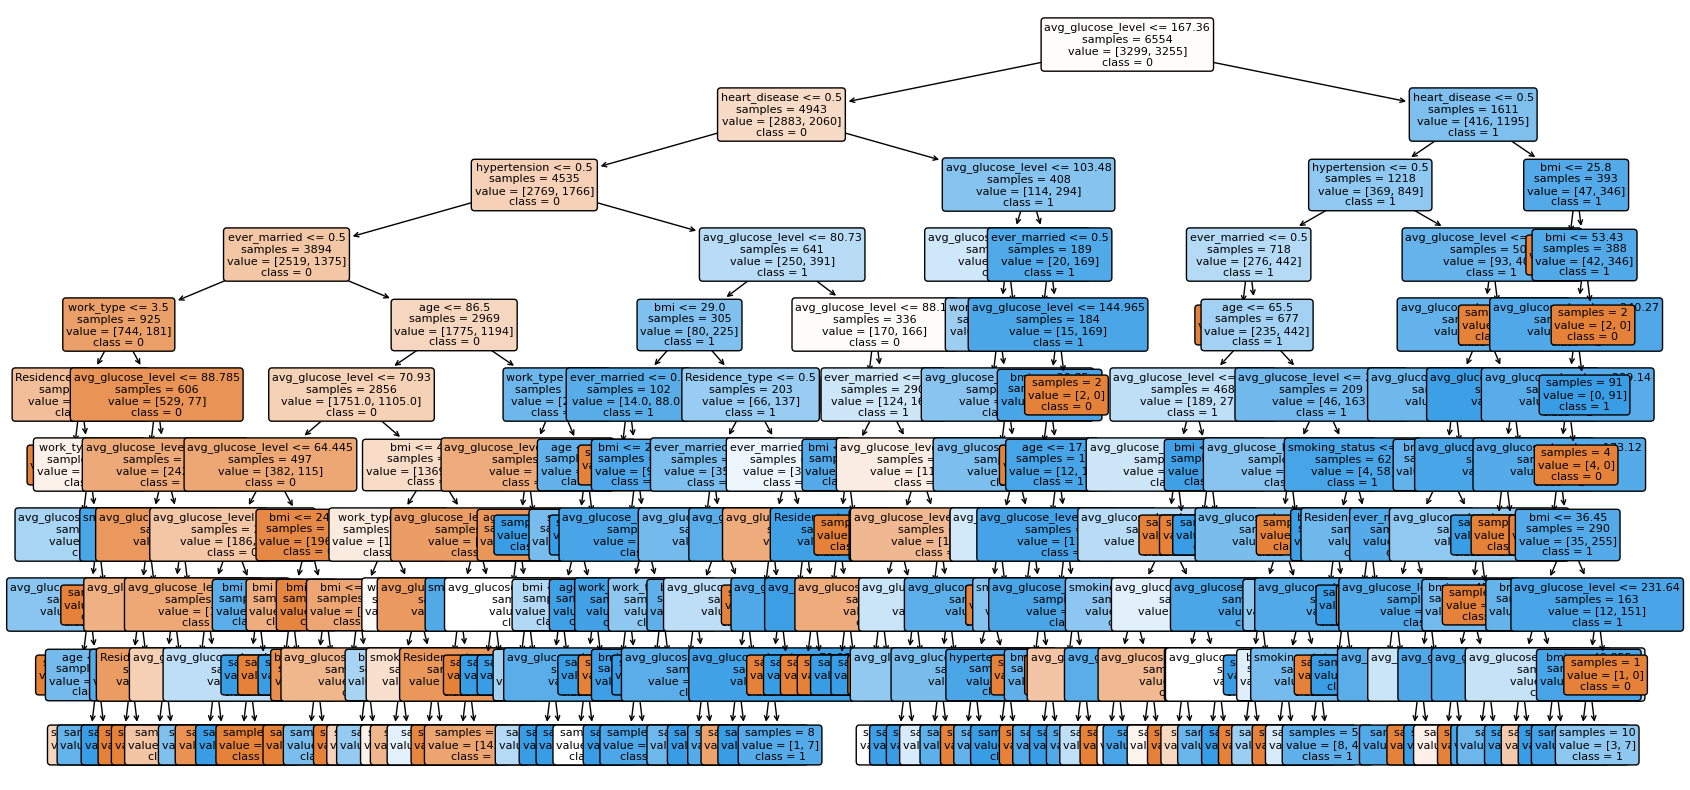

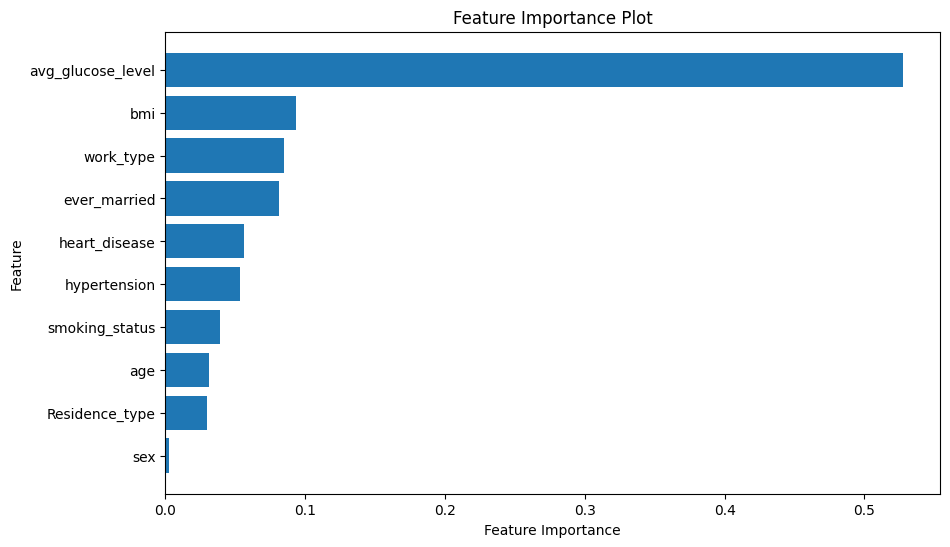

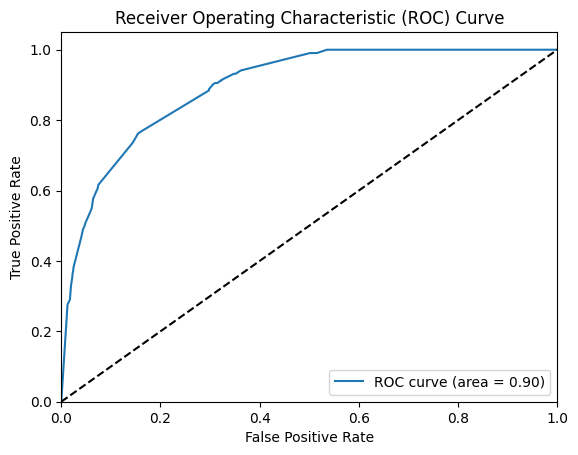

AUC Score: 0.8954771142386205


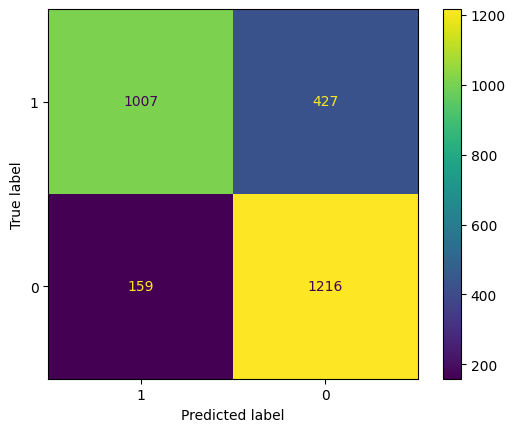

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8576512455516014, 0.8398576512455516, 0.8042704626334519, 0.7829181494661922, 0.8256227758007118, 0.7722419928825622, 0.8469750889679716, 0.8042704626334519, 0.8327402135231317, 0.8214285714285714]
Mean accuracy: 0.8187976614133199
95% confidence interval: (0.7990307869643478, 0.838564535862292)


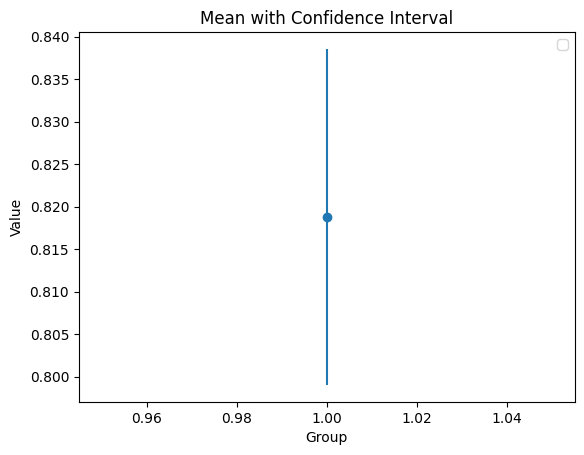


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1434
           1       0.74      0.78      0.76      1375

    accuracy                           0.76      2809
   macro avg       0.76      0.76      0.76      2809
weighted avg       0.76      0.76      0.76      2809



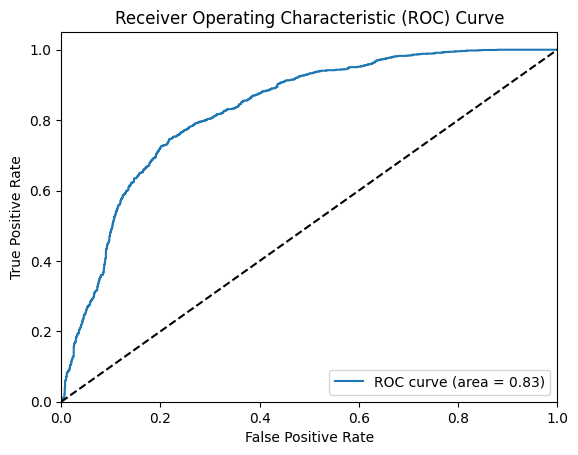

AUC Score: 0.8285355648535566


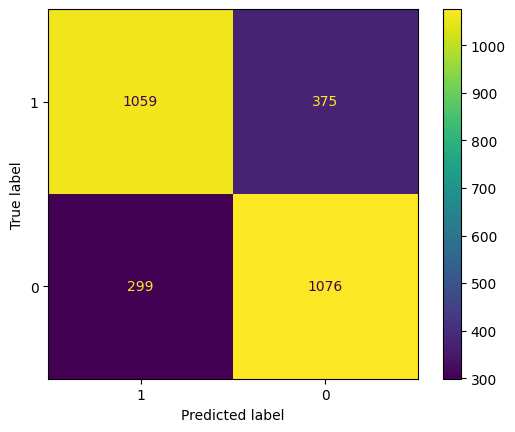

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7437722419928826, 0.7864768683274022, 0.8042704626334519, 0.7580071174377224, 0.7651245551601423, 0.7864768683274022, 0.7259786476868327, 0.7544483985765125, 0.7900355871886121, 0.7964285714285714]
Mean accuracy: 0.7711019318759532
95% confidence interval: (0.7528787822197228, 0.7893250815321836)


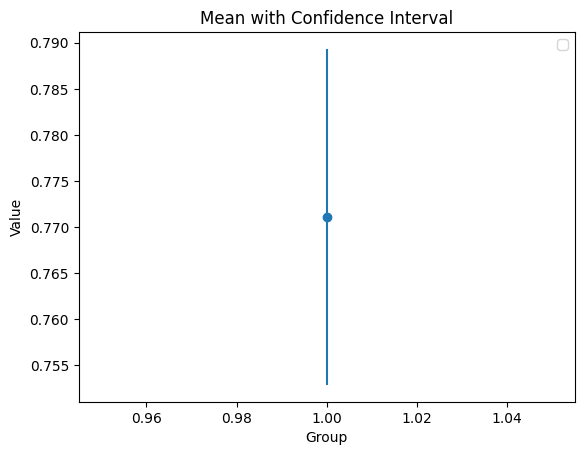

In [3]:
print('ADDING 50% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

inaccuracies on bmi and avg_glucose_level features

ADDING 50% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 4681 rows in column 'avg_glucose_level'
Rows to modify: [1291, 5113, 3454, 2165, 2344, 5894, 5137, 4572, 6295, 8610, 8307, 7123, 981, 965, 6976, 8729, 5225, 8839, 671, 2811, 8659, 7915, 94, 1935, 6999, 2020, 955, 5463, 5520, 5874, 6258, 2810, 7586, 5490, 889, 9075, 3423, 3468, 5969, 7548, 5395, 4953, 7177, 1600, 7901, 7030, 4313, 590, 6325, 5965, 6380, 4452, 5585, 6496, 5498, 7558, 2457, 6080, 6497, 1483, 2157, 1129, 6455, 6491, 6936, 2625, 7909, 6233, 4489, 2251, 967, 5670, 5889, 744, 6408, 3621, 3563, 3631, 5747, 7287, 4143, 234, 6745, 3077, 2695, 8245, 8428, 8185, 1962, 3122, 3734, 7553, 9125, 4848, 6489, 6681, 6560, 7401, 6700, 5535, 4022, 3465, 9138, 9227, 2623, 5720, 29, 5980, 8453, 3807, 3341, 8795, 641, 8130, 7575, 1537, 6631, 7235, 4746, 7955, 1452, 3532, 8259, 9202, 1429, 4494, 8887, 7729, 1179, 7023, 4406, 5719, 4083, 8824, 4335, 1105, 410, 1111, 37, 5611, 3045, 3577, 6146, 6902, 

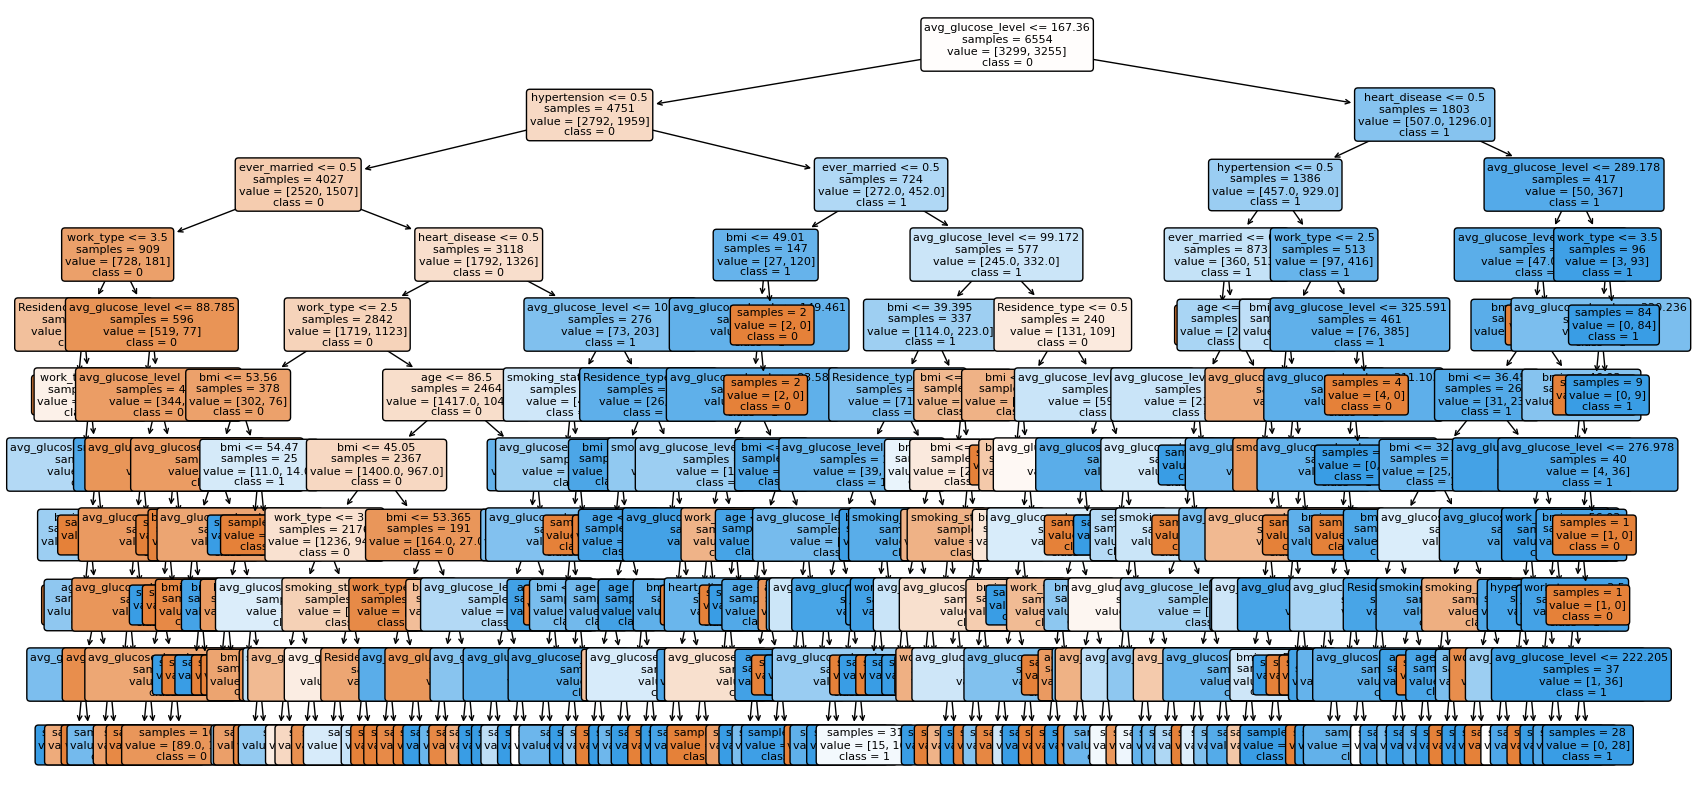

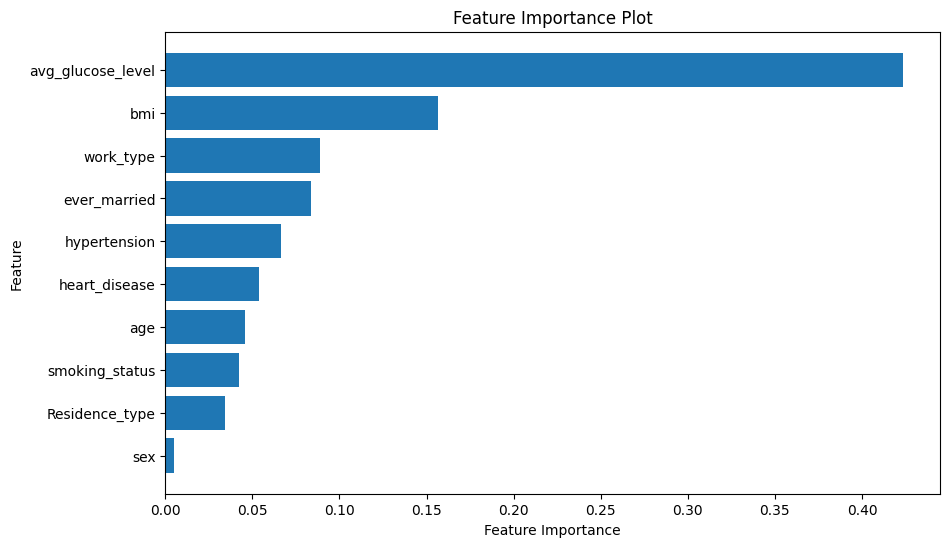

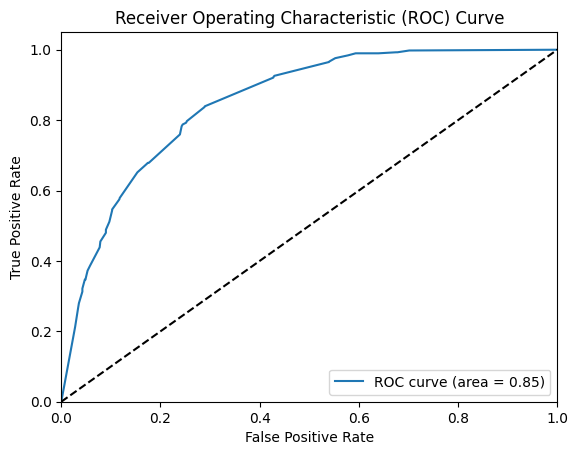

AUC Score: 0.849794345124889


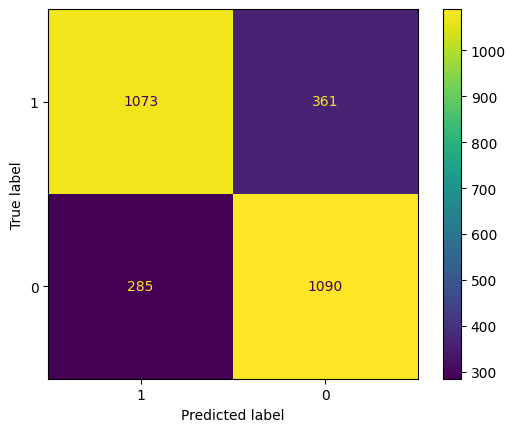

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7900355871886121, 0.7900355871886121, 0.7758007117437722, 0.8113879003558719, 0.8398576512455516, 0.8362989323843416, 0.8362989323843416, 0.8078291814946619, 0.7864768683274022, 0.8035714285714286]
Mean accuracy: 0.8077592780884595
95% confidence interval: (0.7912515771860538, 0.8242669789908652)


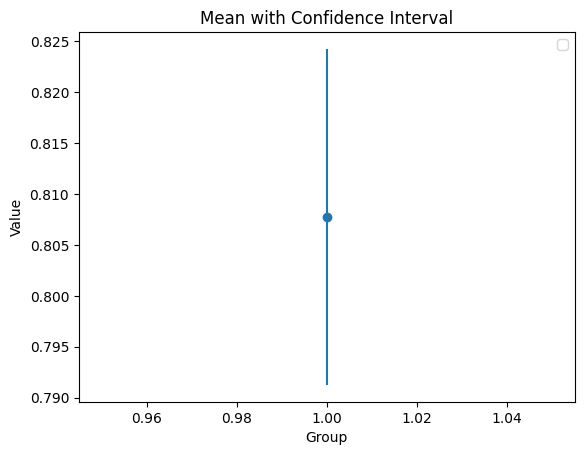


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1434
           1       0.73      0.74      0.74      1375

    accuracy                           0.74      2809
   macro avg       0.74      0.74      0.74      2809
weighted avg       0.74      0.74      0.74      2809



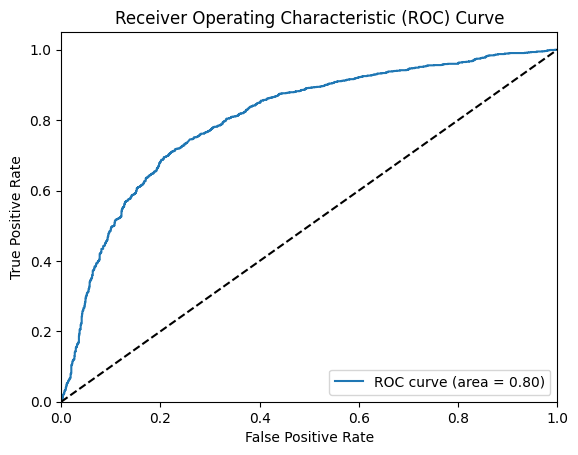

AUC Score: 0.8038757448966654


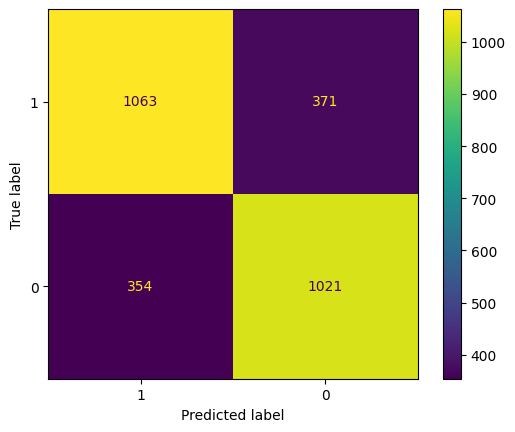

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7651245551601423, 0.7900355871886121, 0.7473309608540926, 0.7829181494661922, 0.7366548042704626, 0.7793594306049823, 0.7544483985765125, 0.7935943060498221, 0.7829181494661922, 0.75]
Mean accuracy: 0.768238434163701
95% confidence interval: (0.7538523265852306, 0.7826245417421713)


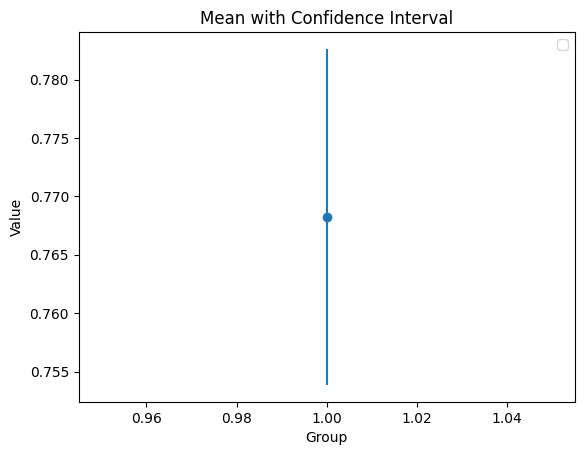

In [4]:
print('ADDING 50% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 50)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 50% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 4681 rows in column 'avg_glucose_level'
Rows to modify: [7704, 7371, 6980, 6522, 6671, 2873, 1239, 6508, 6783, 5692, 8273, 966, 8138, 69, 5685, 1294, 8730, 2120, 2253, 1780, 6900, 6560, 2317, 2327, 9158, 8220, 3314, 5453, 150, 9245, 2726, 5470, 8702, 3482, 4998, 3679, 2502, 5290, 5105, 2177, 1629, 1082, 4841, 137, 3877, 3464, 834, 8418, 4932, 7, 1397, 6631, 1788, 4053, 4811, 8501, 3265, 1003, 4548, 4704, 269, 393, 6180, 5831, 5574, 909, 2825, 6465, 5832, 4474, 4986, 8526, 6570, 4661, 425, 7509, 8817, 4226, 4957, 1114, 4660, 7467, 5947, 2497, 547, 2797, 3953, 2296, 8473, 6963, 4627, 1205, 1861, 8147, 6279, 1167, 4994, 7241, 5285, 5320, 7802, 1572, 2854, 5252, 8559, 4814, 1063, 6736, 1675, 8971, 775, 1267, 2298, 7278, 7713, 8508, 2785, 4476, 9305, 6960, 8369, 1553, 5980, 734, 4348, 1270, 7650, 7990, 5756, 1683, 986, 6880, 3255, 9252, 6290, 4822, 5788, 3830, 2689, 5053, 5760, 4361, 4411, 7647, 8623, 1056, 7

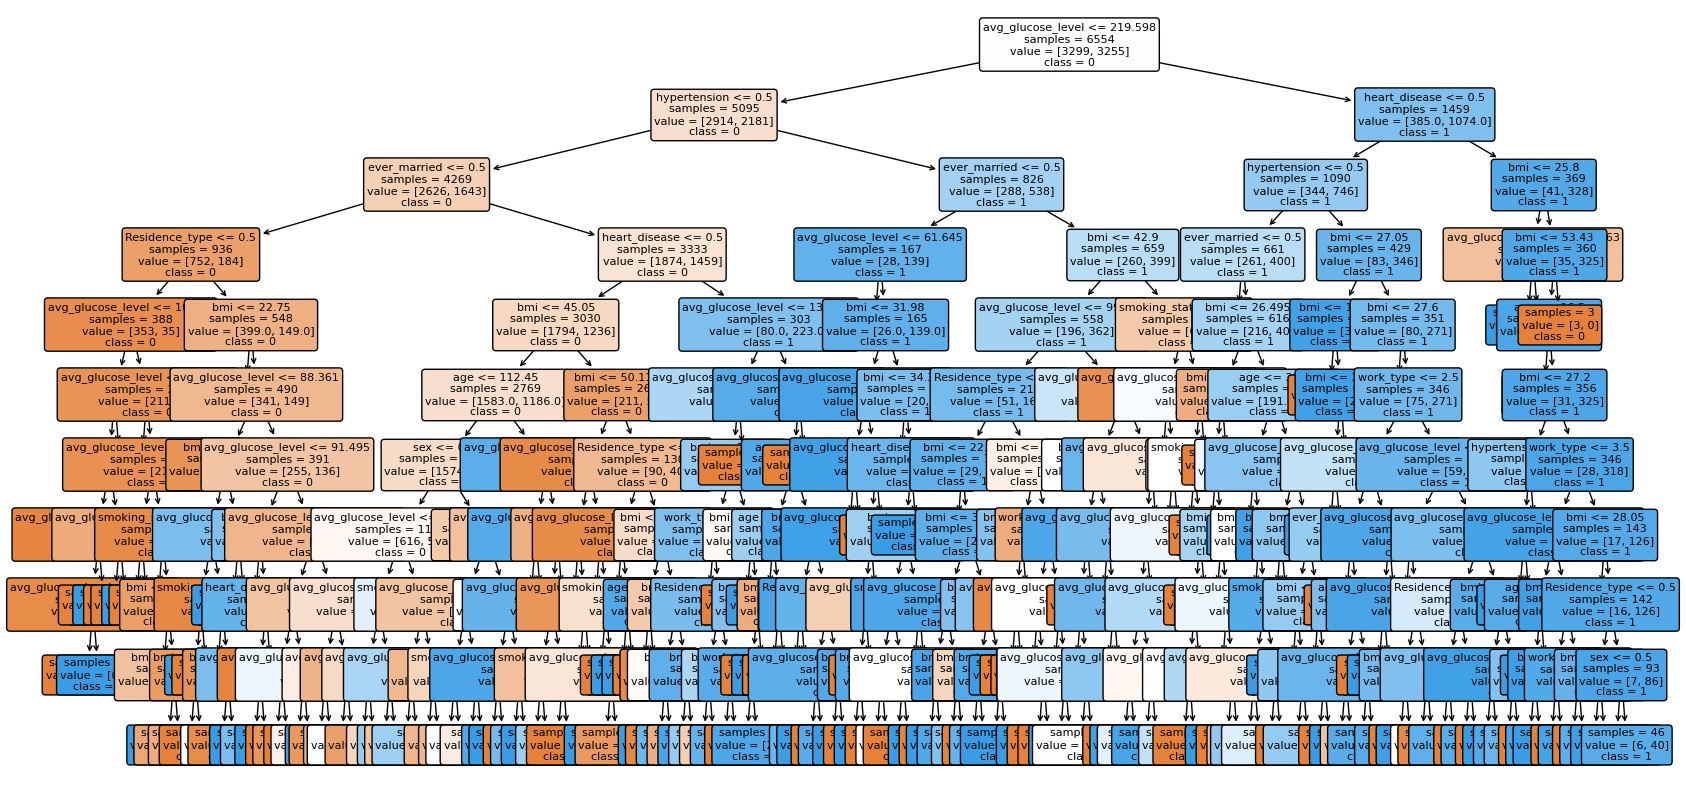

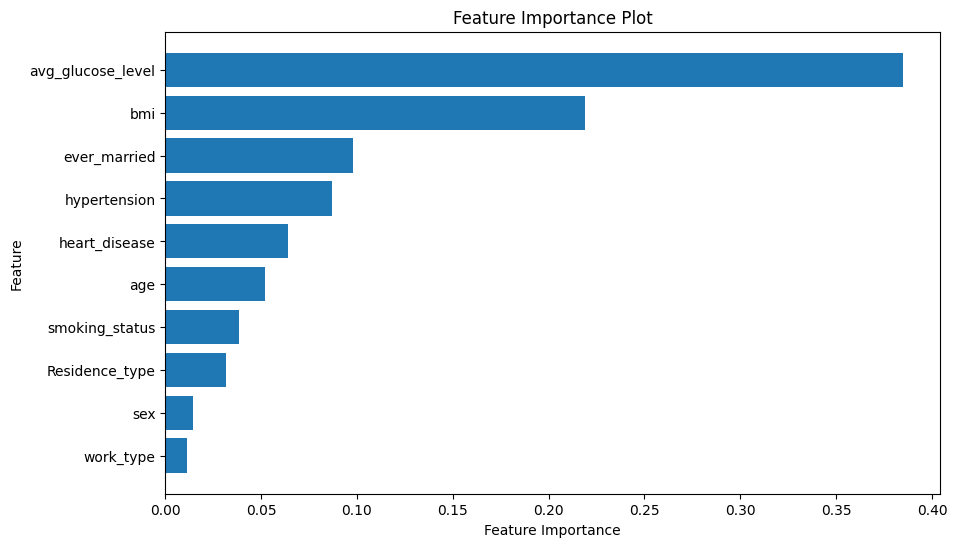

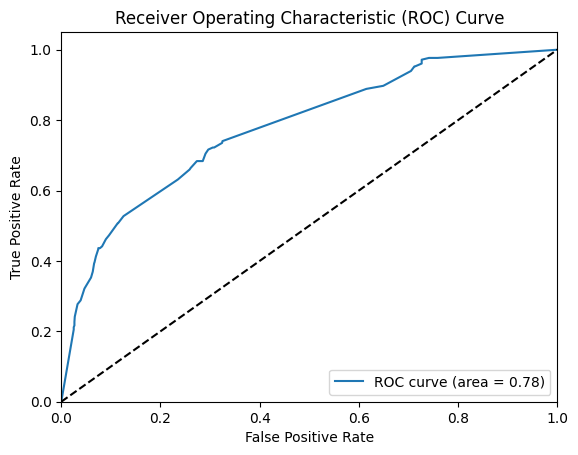

AUC Score: 0.77694484594903


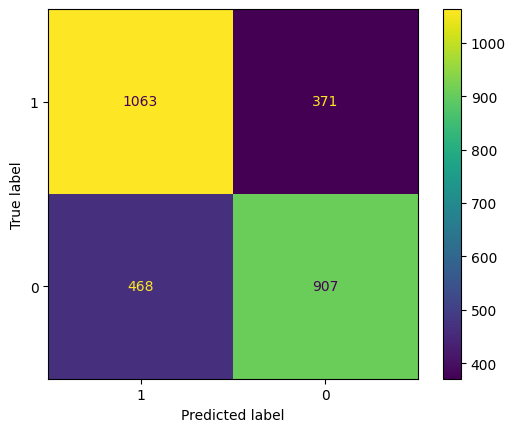

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7829181494661922, 0.8078291814946619, 0.8185053380782918, 0.8042704626334519, 0.8505338078291815, 0.7829181494661922, 0.8185053380782918, 0.8220640569395018, 0.8220640569395018, 0.825]
Mean accuracy: 0.8134608540925268
95% confidence interval: (0.7989791758724868, 0.8279425323125668)


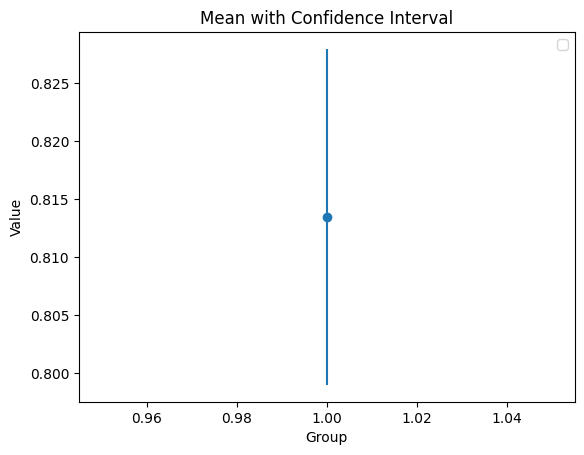


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.76      0.70      1434
           1       0.70      0.58      0.64      1375

    accuracy                           0.67      2809
   macro avg       0.68      0.67      0.67      2809
weighted avg       0.68      0.67      0.67      2809



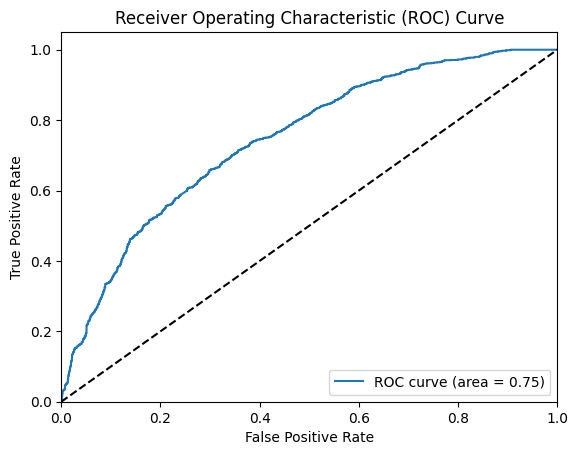

AUC Score: 0.7456181057436287


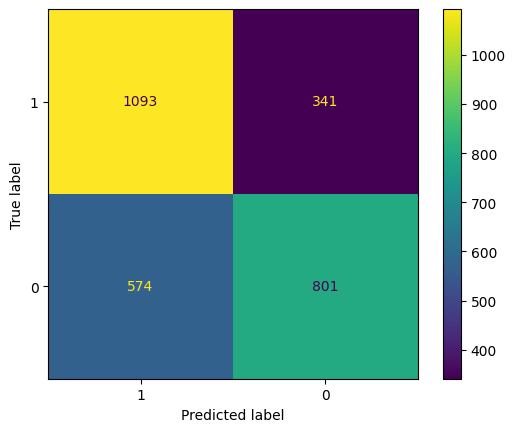

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7864768683274022, 0.8220640569395018, 0.7615658362989324, 0.8042704626334519, 0.7580071174377224, 0.7615658362989324, 0.7437722419928826, 0.7651245551601423, 0.7686832740213523, 0.75]
Mean accuracy: 0.772153024911032
95% confidence interval: (0.7544532433928169, 0.789852806429247)


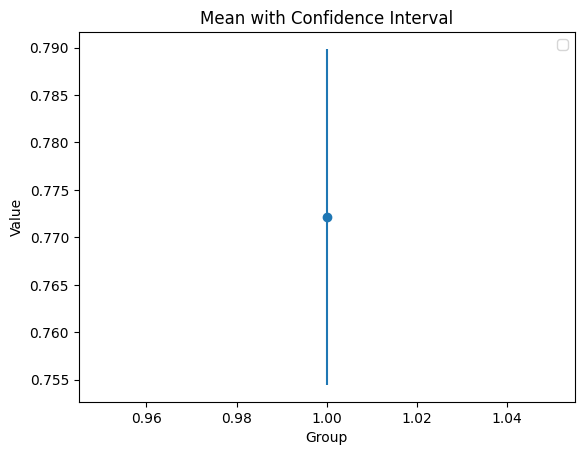

In [5]:
print('ADDING 50% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 50)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

### ROC CURVE - Decision Tree

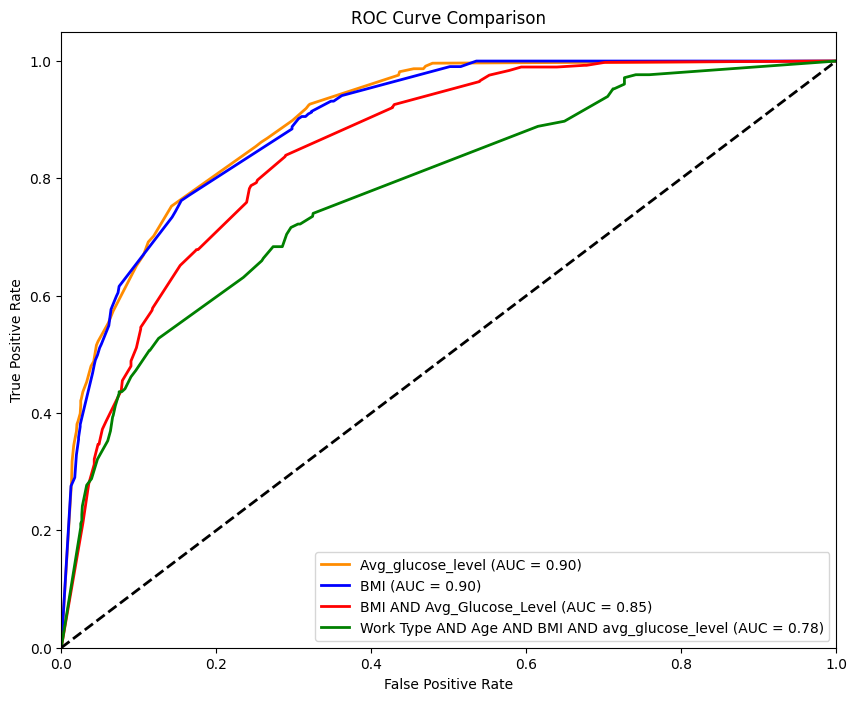

In [6]:
roc_results = [
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_dt, 'Work Type AND Age AND BMI AND avg_glucose_level')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC CURVE - Support Vector Machine

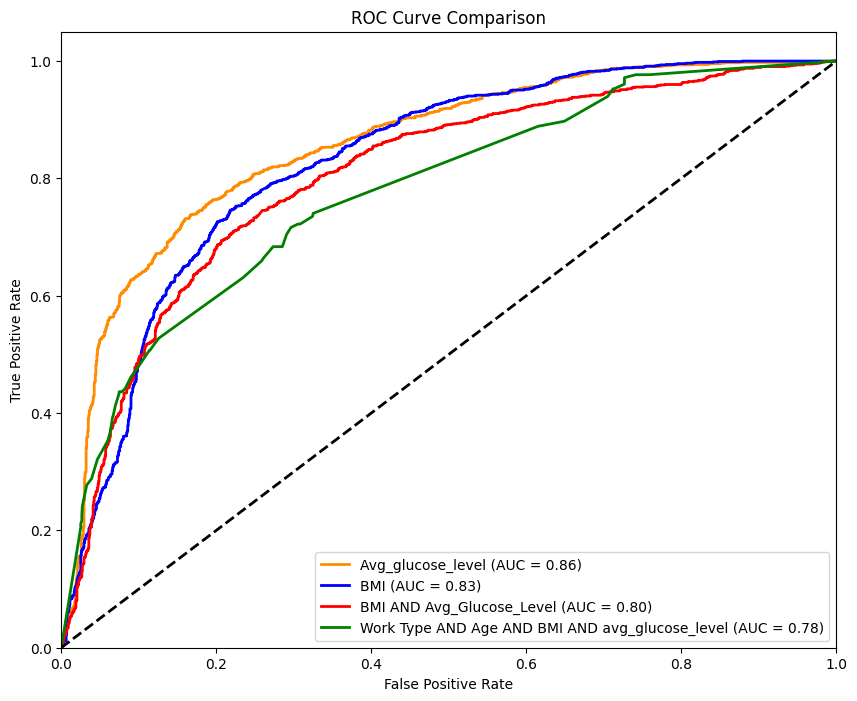

In [7]:
roc_results = [
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_svm, 'Work Type AND Age AND BMI AND avg_glucose_level')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

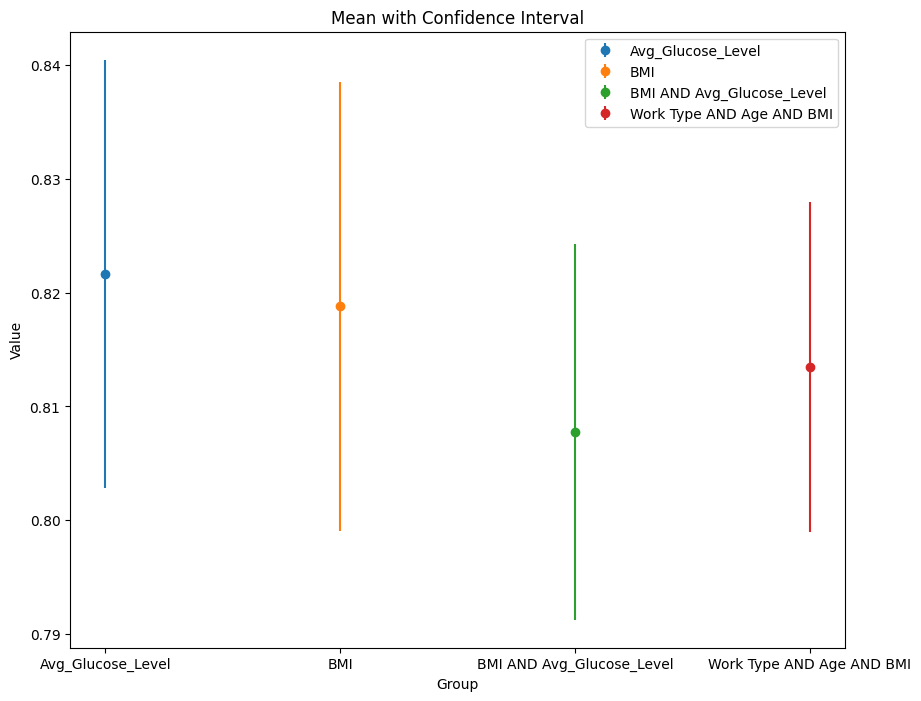

In [8]:
model_results = [
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('BMI AND Avg_Glucose_Level', mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose),
    ('Work Type AND Age AND BMI', mean_accuracy_dt, confidence_interval_dt)
]
ML_algorithms.plot_confidence_intervals(model_results)

### Confidence Interval - Support Vector Machine

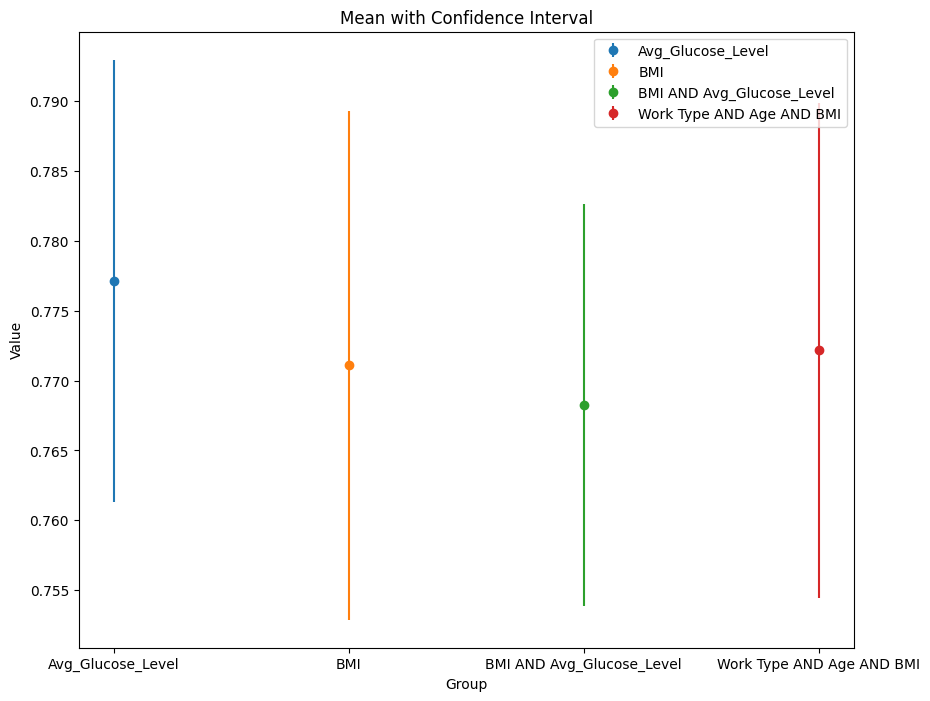

In [9]:
model_results = [
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('BMI AND Avg_Glucose_Level', mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose),
    ('Work Type AND Age AND BMI', mean_accuracy_svm, confidence_interval_svm)
]
ML_algorithms.plot_confidence_intervals(model_results)